In [57]:
import sys
sys.path.extend("./")

In [58]:
import os
import random
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data import detection_utils as utils
import detectron2.data.transforms as T

In [59]:
module_path = os.path.abspath(os.path.join('..'))

In [60]:
sys.path.append(module_path)

In [61]:
from aug_test.mosaic_augmentation import MyMosaicMapper

In [62]:
from common.dataset import register_datasets
from common.config import setup_config

In [63]:
# Define dataset paths
image_root = '../../../dataset/'
json_file = '../../../dataset/train.json'

In [64]:
# Register the dataset
from detectron2.data.datasets.coco import load_coco_json # type: ignore


def register_my_dataset():
    dataset_name = "my_dataset"
    
    # Only register the dataset if it's not already registered
    if dataset_name not in DatasetCatalog.list():
        DatasetCatalog.register(dataset_name, lambda: load_coco_json(json_file, image_root, dataset_name))
        MetadataCatalog.get(dataset_name).set(thing_classes=["General trash", "Paper", "Paper pack", "Metal", 
                                                             "Glass", "Plastic", "Styrofoam", "Plastic bag", 
                                                             "Battery", "Clothing"])


In [65]:
# Register datasets
register_my_dataset()

# Setup config
#cfg = setup_config(training=False)

In [68]:
def visualize_augmentation(dataset_name, num_samples=5, img_size=640):
    dataset_dicts = DatasetCatalog.get(dataset_name)

    for i in range(num_samples):
        # Randomly select an image
        img_dict = random.choice(dataset_dicts)

        # Get original image
        original_image = utils.read_image(img_dict['file_name'], format='BGR')
        
        # Apply MyMapper to visualize mosaic (or normal augmentation)
        augmented_dict = MyMosaicMapper(img_dict, dataset_dicts)  # Pass dataset_dicts for mosaic augmentation
        augmented_image = augmented_dict['image'].numpy().transpose(1, 2, 0)

        # Convert images to proper format for display
        original_image = (original_image / 255.0).astype('float32')  # Scale to [0, 1]
        augmented_image = (augmented_image * 255).astype('uint8')  # Ensure it's in valid range

        # Plot original and augmented images side by side
        plt.figure(figsize=(12, 6))
        
        # Original image
        plt.subplot(1, 2, 1)
        plt.imshow(original_image)
        plt.title(f"Original Image {i + 1}")
        plt.axis('off')

        # Augmented image
        plt.subplot(1, 2, 2)
        plt.imshow(augmented_image)
        plt.title(f"Augmented Image {i + 1}")
        plt.axis('off')

        plt.show()



Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


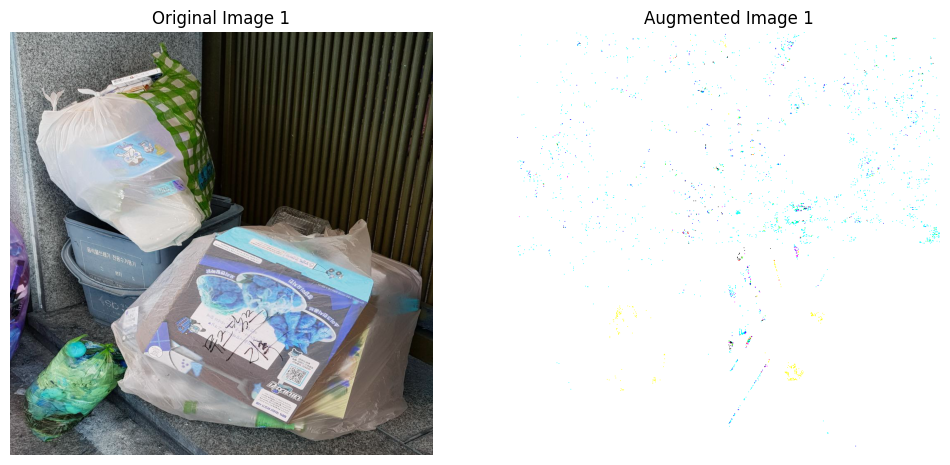

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


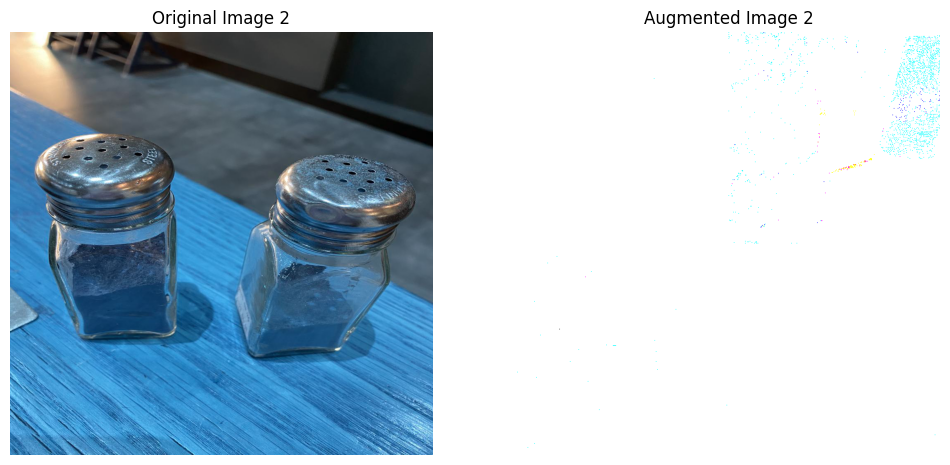

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


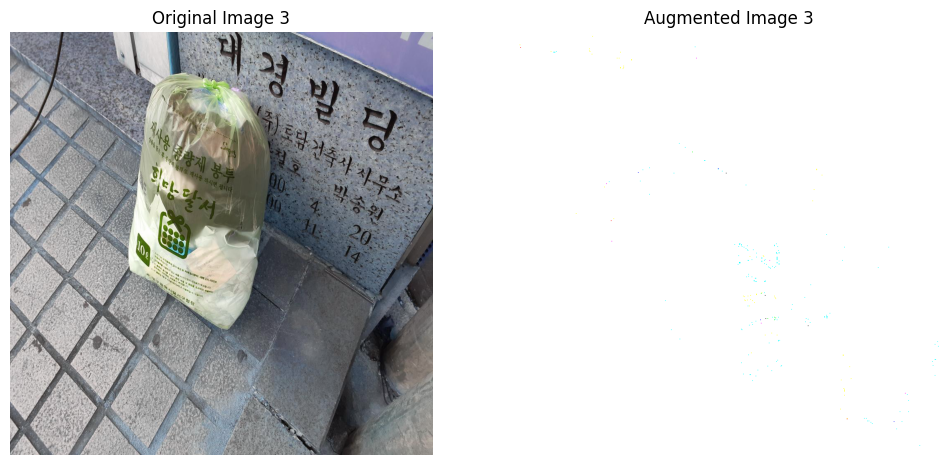

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


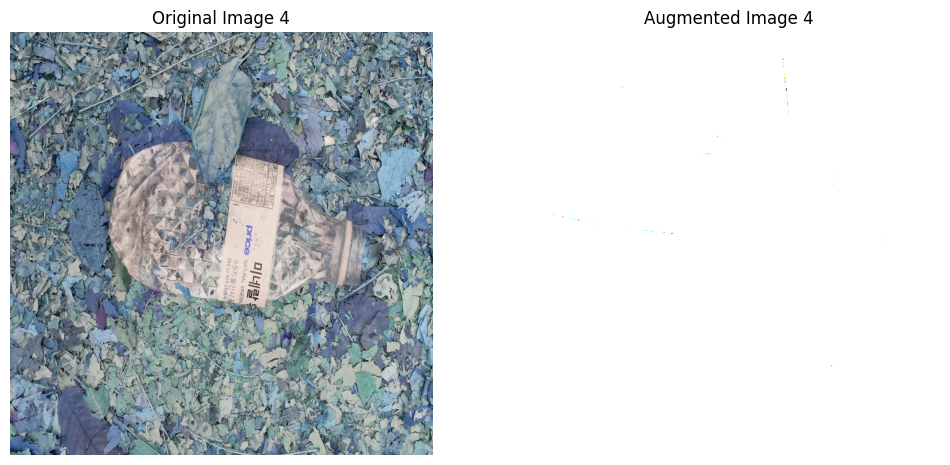

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


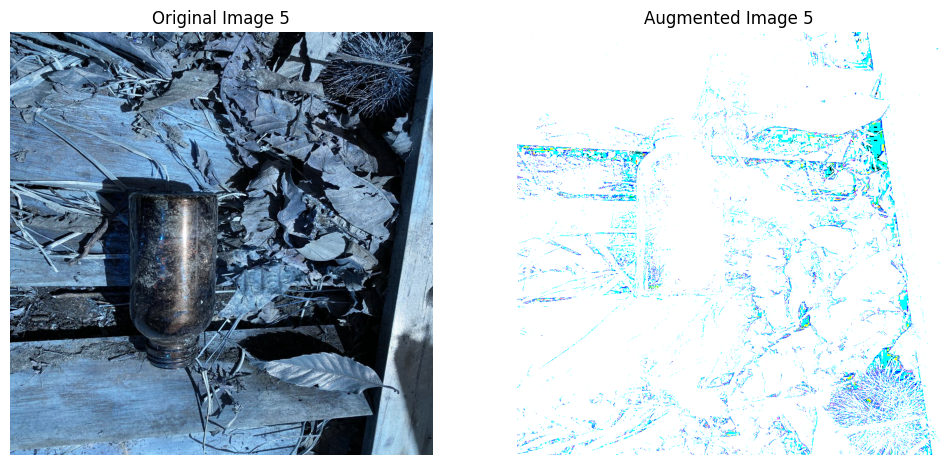

In [69]:
visualize_augmentation('my_dataset', num_samples=5, img_size=640)